In [22]:
%matplotlib inline

In [23]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

In [39]:
# BHR71
# corrected = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/bhr71_spire_corrected.fits'
corrected = '/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits'
extended = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_extended_apod.fits'
point = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
corrected_16as = '/Users/yaolun/bhr71/bhr71_SECT/bhr71_16as_beam.fits'

# L1157
# corrected = '/Users/yaolun/test/L1157/l1157_spire_corrected.fits'
# extended = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_extended_apod.fits'
# point = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_point_apod.fits'

hdu_corrected = fits.open(corrected) # SLWC3:  2; SSWD4:  3 for BHR71; for others, SLWC3: 5, SSWD4: 18 
hdu_extended = fits.open(extended)   # SLWC3: 11; SSWD4: 39
hdu_point = fits.open(point)         # SLWC3:  5; SSWD4: 18
hdu_16as = fits.open(corrected_16as)

pix_slw = np.pi/4.*34**2
pix_ssw = np.pi/4.*19**2

# get the spectra from FITS file
# BHR71
wl_slw_cor = c/1e5/hdu_corrected[2].data.field(0)[3:-3]
flux_slw_cor = hdu_corrected[2].data.field(1)[3:-3]
wl_ssw_cor = c/1e5/hdu_corrected[3].data.field(0)[3:-3]
flux_ssw_cor = hdu_corrected[3].data.field(1)[3:-3]
# other
# wl_slw_cor = c/1e5/hdu_corrected[5].data.field(0)[3:-3]
# flux_slw_cor = hdu_corrected[5].data.field(1)[3:-3]
# wl_ssw_cor = c/1e5/hdu_corrected[18].data.field(0)[3:-3]
# flux_ssw_cor = hdu_corrected[18].data.field(1)[3:-3]

wl_slw_16as = c/1e5/hdu_16as[2].data.field(0)[3:-3]
flux_slw_16as = hdu_16as[2].data.field(1)[3:-3]
wl_ssw_16as = c/1e5/hdu_16as[3].data.field(0)[3:-3]
flux_ssw_16as = hdu_16as[3].data.field(1)[3:-3]

wl_slw_ext = c/1e5/hdu_extended[11].data.field(0)
flux_slw_ext = hdu_extended[11].data.field(1)*pix_slw*(np.pi/180./3600.)**2*1e26
wl_ssw_ext = c/1e5/hdu_extended[39].data.field(0)
flux_ssw_ext = hdu_extended[39].data.field(1)*pix_ssw*(np.pi/180./3600.)**2*1e26

wl_slw_pot = c/1e5/hdu_point[5].data.field(0)
flux_slw_pot = hdu_point[5].data.field(1)
wl_ssw_pot = c/1e5/hdu_point[18].data.field(0)
flux_ssw_pot = hdu_point[18].data.field(1)

In [40]:
# read PACS spectrum
wl_pacs, flux_pacs = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                   skip_header=1).T

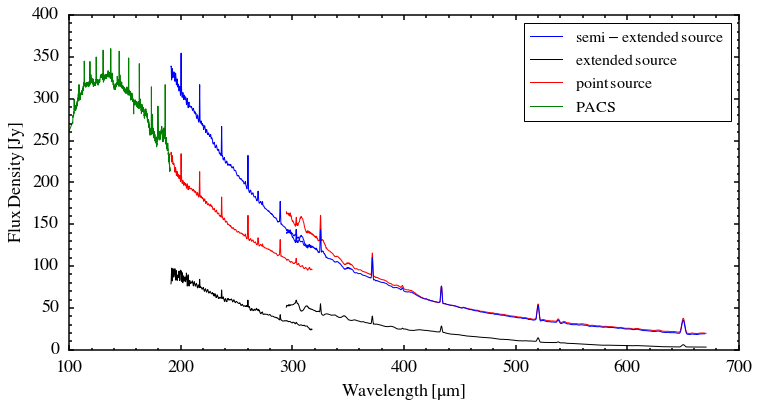

In [42]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ext, = ax.plot(wl_slw_ext, flux_slw_ext, 'k-', linewidth=1)
ax.plot(wl_ssw_ext, flux_ssw_ext, 'k-', linewidth=1)
pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', linewidth=1)
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-', linewidth=1)
cor, = ax.plot(wl_slw_cor, flux_slw_cor, 'b-', linewidth=1)
ax.plot(wl_ssw_cor, flux_ssw_cor, 'b-', linewidth=1)
# cor_16as, = ax.plot(wl_slw_16as, flux_slw_16as, '-', color='Magenta', linewidth=1)
# ax.plot(wl_ssw_16as, flux_ssw_16as, '-', color='Magenta', linewidth=1)

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', linewidth=1)

# ax.legend([cor, ext, pot, pacs, cor_16as], \
#           [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$', r'$\rm{corrected\,with\,16\,arcsec}$'],\
#           numpoints=1, loc='best', fontsize=16)

ax.legend([cor, ext, pot, pacs], \
          [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$'],\
          numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_correction_com.pdf', format='pdf', dpi=300, bbox_inches='tight')